In [7]:
import sys, os
import pandas as pd
import numpy as np

from IPython.display import display

In [8]:
# Declare all variables as strings. Spaces must be replaced with '+', i.e., change 'John Smith' to 'John+Smith'.
# Define the lat, long of the location and the year

p1_lat, p1_lon = 39.835694, -105.359097
p2_lat, p2_lon = 39.855119, -105.297783
p3_lat, p3_lon = 39.655210, -105.402332
p4_lat, p4_lon = 39.965930, -105.440591

# You must request an NSRDB api key from the link above
api_key = '1gHoGjlIGeXbQOpiunnlRrJS9vYYb490MA4n9X7s'
# Set the attributes to extract (e.g., dhi, ghi, etc.), separated by commas.
attributes = 'air_temperature,solar_zenith_angle,dew_point,relative_humidity,surface_albedo,surface_pressure,total_precipitable_water,wind_speed,wind_direction,ghi,dhi,dni'
   
# Choose year of data
year = '2010'
# Set leap year to true or false. True will return leap day data if present, false will not.
leap_year = 'false'
# Set time interval in minutes, i.e., '30' is half hour intervals. Valid intervals are 30 & 60.
interval = '30'
# Specify Coordinated Universal Time (UTC), 'true' will use UTC, 'false' will use the local time zone of the data.
# NOTE: In order to use the NSRDB data in SAM, you must specify UTC as 'false'. SAM requires the data to be in the
# local time zone.
utc = 'false'
# Your full name, use '+' instead of spaces.
your_name = 'Sara+Abouelella'
# Your reason for using the NSRDB.
reason_for_use = 'interview'
# Your affiliation
your_affiliation = 'student'
# Your email address
your_email = 'sabouelella3@gatech.edu'
# Please join our mailing list so we can keep you up-to-date on new developments.
mailing_list = 'false'

# Declare url string
url = 'https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=p4_lat, lon=p4_lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes)
# Return just the first 2 lines to get metadata:
info = pd.read_csv(url, nrows=1)
# See metadata for specified properties, e.g., timezone and elevation
timezone, elevation = info['Local Time Zone'], info['Elevation']

In [9]:
# View metadata
info

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Cloud Type 11,Cloud Type 12,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Surface Albedo Units,Version
0,NSRDB,148698,-,-,-,39.97,-105.46,-7,2529,-7,...,Dust,Smoke,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,NaN,3.0.6


In [12]:
# Return all but first 2 lines of csv to get data:
df = pd.read_csv('https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=p1_lat, lon=p1_lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)

# Set the time index in the pandas dataframe:
df = df.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))
# df.set_index()
# take a look
print('shape:', df.shape)
df.head(8)
# print(df.iloc[2,:])

shape: (17520, 17)


,Year,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI
2010-01-01 00:00:00,2010,1,1,0,0,-10,163.12,-16,59.53,0.866,750,0.479,3.8,267.3,0,0,0
2010-01-01 00:30:00,2010,1,1,0,30,-10,162.32,-16,55.02,0.866,750,0.486,3.8,267.3,0,0,0
2010-01-01 01:00:00,2010,1,1,1,0,-10,159.50,-16,55.62,0.866,750,0.493,3.9,268.8,0,0,0
2010-01-01 01:30:00,2010,1,1,1,30,-9,155.34,-16,55.63,0.866,750,0.501,3.9,268.8,0,0,0
2010-01-01 02:00:00,2010,1,1,2,0,-9,150.42,-15,57.88,0.866,750,0.509,3.9,270.0,0,0,0
2010-01-01 02:30:00,2010,1,1,2,30,-9,145.08,-15,53.54,0.866,750,0.516,3.8,270.0,0,0,0
2010-01-01 03:00:00,2010,1,1,3,0,-9,139.51,-14,57.22,0.866,750,0.523,3.8,270.0,0,0,0
2010-01-01 03:30:00,2010,1,1,3,30,-9,133.81,-14,57.23,0.866,750,0.527,3.7,270.0,0,0,0


In [14]:
# df.insert(3, 'MonthDay', df['Month']*100+df['Day']*10+df['Minute'])
dff = df.drop(columns=['Year'], axis=1)

dff.head()

,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI
2010-01-01 00:00:00,1,1,0,0,-10,163.12,-16,59.53,0.866,750,0.479,3.8,267.3,0,0,0
2010-01-01 00:30:00,1,1,0,30,-10,162.32,-16,55.02,0.866,750,0.486,3.8,267.3,0,0,0
2010-01-01 01:00:00,1,1,1,0,-10,159.50,-16,55.62,0.866,750,0.493,3.9,268.8,0,0,0
2010-01-01 01:30:00,1,1,1,30,-9,155.34,-16,55.63,0.866,750,0.501,3.9,268.8,0,0,0
2010-01-01 02:00:00,1,1,2,0,-9,150.42,-15,57.88,0.866,750,0.509,3.9,270.0,0,0,0


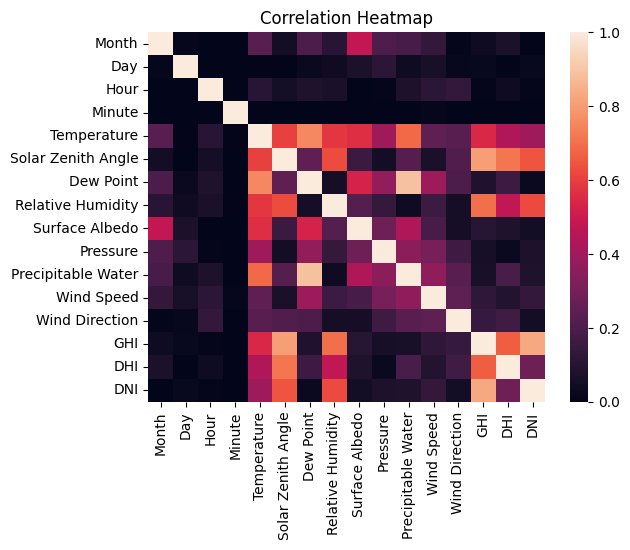

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = abs(dff.corr())
heatmap = sns.heatmap(abs(corr_matrix))
plt.title('Correlation Heatmap')
plt.show()

In [16]:
win_size = 8
X = np.zeros((dff.shape[0] - win_size, win_size * dff.shape[1]))
Y = np.zeros((dff.shape[0] - win_size, 1))
print("Feature array size:{}, Labels array size{}".format(X.shape, Y.shape))
for i in range(X.shape[0]):
    chunk_x = dff.iloc[i:i+win_size, :].to_numpy()
    chunk_y = dff.iloc[i+win_size, -1]
    X[i] = np.reshape(chunk_x, (1, dff.shape[1] * win_size))
    Y[i]= chunk_y
    # if i == 5:
    #     print("X = ", X[0])
    #     print("Y = ", Y[0])

Feature array size:(17512, 128), Labels array size(17512, 1)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [20]:
import tensorflow
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense